In [56]:
import BioSimSpace as BSS
import csv
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from scipy import stats

In [2]:
free_quints = []
bound_quints = []

# quintuplicates provided by Cresset. FEP+/JACS set.
with open("compiled_mbar_freenrgs_cresset_jacs.csv", "r") as readfile:
    reader = csv.reader(readfile)
    next(reader)
    for row in reader:
        if "free" in row[0]:
            free_quints.append([row[0].replace("mcl","mcl1"), row[-1]])
        elif "bound" in row[0]:
            bound_quints.append([row[0].replace("mcl","mcl1"), row[-1]])


In [71]:
bound_sems = []
bound_lomaps = []
bound_tgts = []

for pert in bound_quints:
    print(pert)
    lig_1 = lig_2 = None
    
    base_path = "/home/jscheen/projects/FEPSPACE/fep_ref_ligands"
    
    ligname_1, ligname_2 = "_".join(pert[0].split("_")[:-2]).split("~")

    lig_1 = BSS.IO.readMolecules([f"{base_path}/{pert[0].split('_')[-2]}/lig_{ligname_1}.mol2"])[0]
    lig_2 = BSS.IO.readMolecules([f"{base_path}/{pert[0].split('_')[-2]}/lig_{ligname_2}.mol2"])[0]

    sem = pert[1]
    _, lomap_score = BSS.Align.generateNetwork([lig_1, lig_2], names=["lig_1", "lig_2"], plot_network=False)
    try:
        bound_lomaps.append(1/lomap_score[0])
        bound_sems.append(float(sem))
        bound_tgts.append(pert[0].split('_')[-2])
    except IndexError:
        pass

['18631-1~18634-1_jnk1_bound', '0.09324301350900235']
['45~27_mcl1_bound', '0.1909979937216619']
['18625-1~18624-1_jnk1_bound', '0.21606372888330888']
['ejm_45~ejm_31_tyk2_bound', '0.05775899725705045']
['20667_2qbp~23486_ptp1b_bound', '0.0852567910849335']
['18624-1~18628-1_jnk1_bound', '0.2283921761927496']
['CAT-4d~CAT-4b_bace_bound', '0.10919213102463017']
['6b~6e_thrombin_bound', '0.11766570574105269']
['CAT-4l~CAT-4i_bace_bound', '0.043005161321170875']
['1b~1c_thrombin_bound', '0.03508438219008563']
['7a~3a_thrombin_bound', '0.23479623375139555']
['3b~1a_thrombin_bound', '0.20847355192359532']
['18634-1~18624-1_jnk1_bound', '0.13266647793448047']
['CAT-4l~CAT-4p_bace_bound', '0.21752982351516706']
['6a~6e_thrombin_bound', '0.08449686532730076']
['6e~1a_thrombin_bound', '0.2191873079143498']
['27~47_mcl1_bound', '0.16826716735851946']
['20670_2qbs~23477_ptp1b_bound', '0.041538273527675196']
['CAT-13j~CAT-13n_bace_bound', '0.18372731462888345']
['p38a_3fly~p38a_3flw_p38_bound', '1

In [72]:
free_sems = []
free_lomaps = []
free_tgts = []

for pert in free_quints:
    print(pert)
    lig_1 = lig_2 = None
    
    base_path = "/home/jscheen/projects/FEPSPACE/fep_ref_ligands"
    
    ligname_1, ligname_2 = "_".join(pert[0].split("_")[:-2]).split("~")

    lig_1 = BSS.IO.readMolecules([f"{base_path}/{pert[0].split('_')[-2]}/lig_{ligname_1}.mol2"])[0]
    lig_2 = BSS.IO.readMolecules([f"{base_path}/{pert[0].split('_')[-2]}/lig_{ligname_2}.mol2"])[0]

    sem = pert[1]
    _, lomap_score = BSS.Align.generateNetwork([lig_1, lig_2], names=["lig_1", "lig_2"], plot_network=False)
    try:
        free_lomaps.append(1/lomap_score[0])
        free_sems.append(float(sem))
        free_tgts.append(pert[0].split('_')[-2])
    except IndexError:
        pass

['23477~23466_ptp1b_free', '1.7941145406992105']
['45~27_mcl1_free', '0.09654169222962689']
['27~47_mcl1_free', '0.1361600009762779']
['CAT-4d~CAT-4b_bace_free', '0.08278496758590896']
['1c~1d_thrombin_free', '0.03513401351340322']
['p38a_2aa~p38a_3fly_p38_free', '0.08156461679588732']
['6e~1a_thrombin_free', '0.09634919523825829']
['18631-1~18634-1_jnk1_free', '0.1362110453224701']
['20667_2qbp~23486_ptp1b_free', '0.043586489299552354']
['6a~6e_thrombin_free', '0.04722138432638331']
['18624-1~18628-1_jnk1_free', '0.058298927700601855']
['20670_2qbs~23477_ptp1b_free', '0.051233608439772683']
['p38a_3fly~p38a_3fmk_p38_free', '0.19689293765714402']
['18631-1~18624-1_jnk1_free', '0.033593391624841894']
['ejm_46~jmc_30_tyk2_free', '0.1726281884514808']
['jmc_28~jmc_30_tyk2_free', '0.05826929616238706']
['ejm_45~ejm_31_tyk2_free', '0.23619031868994997']
['6b~6e_thrombin_free', '0.035820924078811794']
['18625-1~18624-1_jnk1_free', '0.0773255788936623']
['18634-1~18624-1_jnk1_free', '0.105801

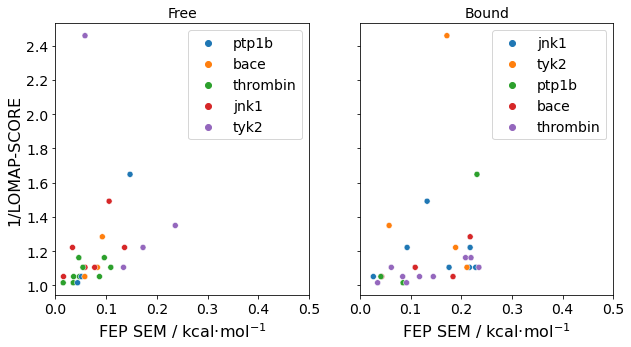

In [74]:
fig, axes = plt.subplots(1,2, figsize=(10,5), sharey=True)

sns.scatterplot(free_sems,free_lomaps, hue=free_tgts, ax=axes[0])
axes[0].set_title("Free")

sns.scatterplot(bound_sems, bound_lomaps, hue=bound_tgts, ax=axes[1])
axes[1].set_title("Bound")  
axes[0].set_ylabel("1/LOMAP-SCORE")
axes[1].set_ylabel("1/LOMAP-SCORE")


axes[0].set_xlabel("FEP SEM / kcal$\cdot$mol$^{-1}$")
axes[1].set_xlabel("FEP SEM / kcal$\cdot$mol$^{-1}$")
for ax in axes:
    ax.set_xlim(0, 0.5)
plt.show()